<a href="https://www.kaggle.com/code/ahsanrazib8/heart-attack-assessment?scriptVersionId=220688937" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import xgboost 
from xgboost import XGBClassifier
from imblearn.combine import SMOTETomek
import seaborn as sns 
import matplotlib.pyplot as plt 

import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

df = pd.read_csv('/kaggle/input/heart-attack-risk-assessment-dataset/updated_version.csv')
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)



/kaggle/input/heart-attack-risk-assessment-dataset/updated_version.csv


In [2]:
df.shape

(1000, 10)

In [3]:
df.head()

,age,sex,total_cholesterol,ldl,hdl,systolic_bp,diastolic_bp,smoking,diabetes,heart_attack
0,57,1,229.463642,175.879129,39.225687,124.070127,91.378780,0,0,0
1,58,1,186.464120,128.984916,34.950968,95.492552,64.355040,1,0,0
2,37,1,251.300719,152.347592,45.913288,99.519335,64.953147,0,1,0
3,55,1,192.058908,116.803684,67.208925,122.460002,73.821382,0,0,0
4,53,1,151.203448,107.017396,60.693838,123.022257,81.121946,0,1,0


In [4]:
df.isnull().sum()

age                  0
sex                  0
total_cholesterol    0
ldl                  0
hdl                  0
systolic_bp          0
diastolic_bp         0
smoking              0
diabetes             0
heart_attack         0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                1000 non-null   int64  
 1   sex                1000 non-null   int64  
 2   total_cholesterol  1000 non-null   float64
 3   ldl                1000 non-null   float64
 4   hdl                1000 non-null   float64
 5   systolic_bp        1000 non-null   float64
 6   diastolic_bp       1000 non-null   float64
 7   smoking            1000 non-null   int64  
 8   diabetes           1000 non-null   int64  
 9   heart_attack       1000 non-null   int64  
dtypes: float64(5), int64(5)
memory usage: 78.2 KB


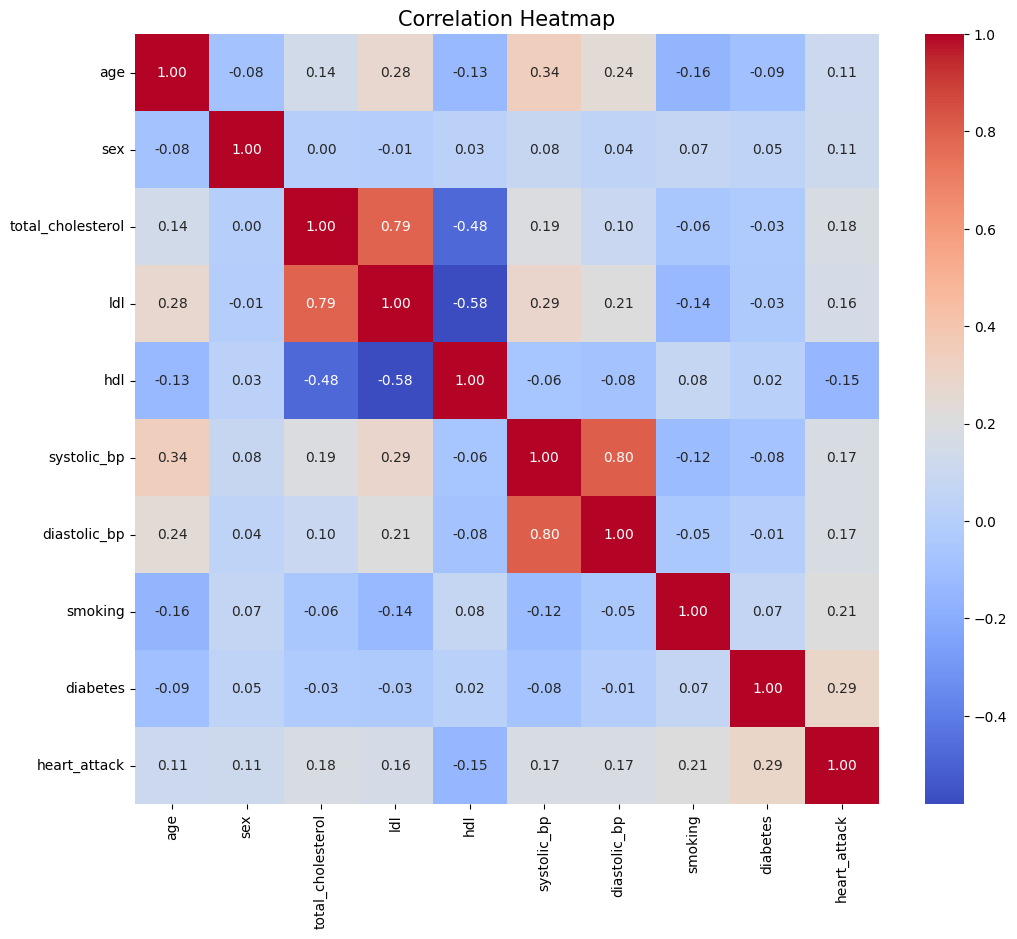

In [6]:
plt.figure(figsize=(12, 10)) 

sns.heatmap(df.corr(numeric_only=True), 
            annot=True,        # Annotate with correlation values
            fmt=".2f",         # Format the correlation values
            cmap='coolwarm',   # Choose a color map
            cbar=True)         # Display the color bar

plt.title('Correlation Heatmap', fontsize=15)
plt.show()

In [7]:
x = df.drop('heart_attack', axis=1)
y = df[['heart_attack']]

In [8]:
x.shape

(1000, 9)

In [9]:
y.shape

(1000, 1)

In [10]:
y.value_counts()

heart_attack
0               896
1               104
Name: count, dtype: int64

In [11]:
scaled = StandardScaler()
x_scaled = scaled.fit_transform(x)

# Logistic Regression

In [12]:
reg = LogisticRegression()

In [13]:
#xtrain1, xtest1, ytrain1, ytest1 = train_test_split(x, y, train_size=.75,random_state=42) 
xtrain1, xtest1, ytrain1, ytest1 = train_test_split(x_scaled, y, train_size=.75,random_state=42) 
reg.fit(xtrain1, ytrain1)
reg.score(xtrain1, ytrain1) 

0.9053333333333333

In [14]:
reg.score(xtest1,ytest1)

0.916

# Sampling

In [15]:
sm = SMOTETomek(random_state=100)
X, Y = sm.fit_resample(x_scaled,y)

In [16]:
X.shape

(1778, 9)

In [17]:
Y.shape

(1778, 1)

In [18]:
Y.value_counts()

heart_attack
0               889
1               889
Name: count, dtype: int64

# XGBoost

In [19]:
xtrain1_sam, xtest1_sam, ytrain1_sam, ytest1_sam = train_test_split(X, Y, train_size=.75,random_state=42) 
xgb_sam = XGBClassifier()
xgb_sam.fit(xtrain1_sam, ytrain1_sam) 

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [20]:
xgb_sam.score(xtrain1_sam, ytrain1_sam)

1.0

In [21]:
xgb_sam.score(xtest1_sam, ytest1_sam)

0.9258426966292135